# Part 3: Predict churn

## 1) Load preprocessed data

In [62]:
import pandas as pd                 
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

# read data from csv file
dataset=pd.read_csv('churn.csv') 

# encode categorical data
encoder = LabelEncoder()
dataset["Geography"] = encoder.fit_transform(dataset["Geography"])
dataset["Gender"] = encoder.fit_transform(dataset["Gender"])

# dropping irrelevant features columns (using pandas drop()): rownumber, customerId, and surname
dataset.drop(["RowNumber","CustomerId","Surname"], axis=1, inplace=True)

## 2) Divide the whole dataset into training data and test data

In [63]:
X = dataset.drop("Exited", axis=1)
y = dataset["Exited"]

X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


### Cross validation to divide the whole dataset into training data and test data

In [64]:
from sklearn.model_selection import KFold 
k = 10   # 10 folds
kf = KFold(n_splits = k, random_state = None) # Define the split - into 10 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]

## 3) Predict churn based some models

In [65]:
from sklearn.metrics import (accuracy_score, f1_score,average_precision_score, confusion_matrix,
                             average_precision_score, precision_score, recall_score, roc_auc_score)
import seaborn as sns
import numpy as np

### Model 1: Logistic regression

Accuracy: 80.20%


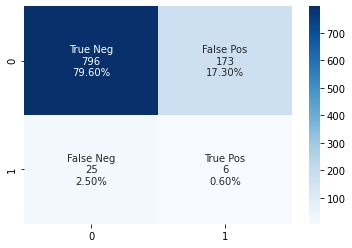

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

clf = LogisticRegression()     # L2 regularization is applied by default
clf.fit(X_train, y_train)

pred = clf.predict(X_test)

accuracy = accuracy_score(pred, y_test)
print("Accuracy:", '{:.2%}'.format(accuracy))

cf_matrix = confusion_matrix(pred, y_test)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, fmt = '', cmap = 'Blues')

### Model 2: Decision tree

Accuracy: 81.00%


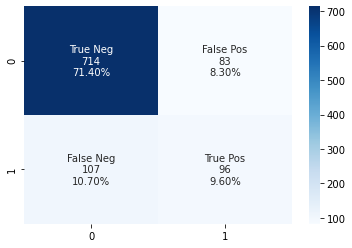

In [67]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
accuracy = accuracy_score(pred, y_test)
print("Accuracy:", '{:.2%}'.format(accuracy))

cf_matrix = confusion_matrix(pred, y_test)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, fmt = '', cmap = 'Blues')

### Model 3: SVM

Accuracy: 82.10%


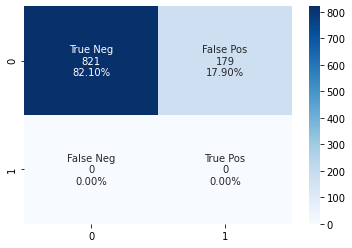

In [68]:
from sklearn import svm

# support vector classifier using linear hyper plane
clf = svm.SVC(C=1.0, kernel = 'rbf', probability = True, random_state = 124)
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
accuracy = accuracy_score(pred, y_test)
print("Accuracy:", '{:.2%}'.format(accuracy))

cf_matrix = confusion_matrix(pred, y_test)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, fmt = '', cmap = 'Blues')

### Model 4: Random forest

Accuracy: 86.80%


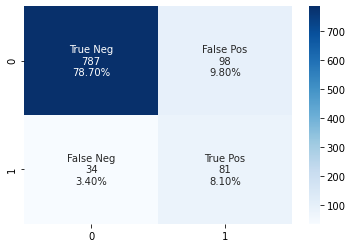

In [69]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 200, random_state=200)
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
accuracy = accuracy_score(pred, y_test)
print("Accuracy:", '{:.2%}'.format(accuracy))

cf_matrix = confusion_matrix(pred, y_test)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, fmt = '', cmap = 'Blues')

### Model 4 improved with SMOTE method

Accuracy: 96.23%


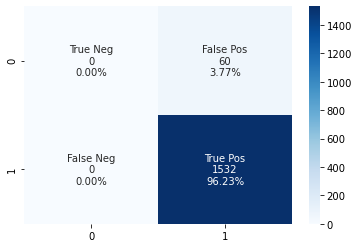

In [70]:
#Improve the predictive model using SMOTE method for class-imbalance
from imblearn.over_sampling import SMOTE

# Feature scaling
scaler = MinMaxScaler() 

bumpy_features = ["Gender", "Age", "Balance",'IsActiveMember']

df_scaled = pd.DataFrame(data = X)
df_scaled[bumpy_features] = scaler.fit_transform(X[bumpy_features])

df_scaled.head()

# over sampling
# Synthetic minority oversampling technique (SMOTE)
X = df_scaled
sm  = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(X, y)


from sklearn.model_selection import KFold 
k = 10   # 10 folds
kf = KFold(n_splits = k, random_state = None) # Define the split - into 10 folds 
kf.get_n_splits(X_res) # returns the number of splitting iterations in the cross-validator

for train_index, test_index in kf.split(X_res):
    X_train, X_test = X_res.iloc[train_index,:], X_res.iloc[test_index,:]
    y_train, y_test = y_res[train_index], y_res[test_index]


clf = RandomForestClassifier(n_estimators = 200, random_state=200)
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
accuracy = accuracy_score(pred, y_test)
print("Accuracy:", '{:.2%}'.format(accuracy))

cf_matrix = confusion_matrix(pred, y_test)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, fmt = '', cmap = 'Blues')